# Addition and Subtraction of Vectors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

origin = [0,0] # origin point

def draw_addition(x, y):
    # calculate x + y
    xPlusy = (x[0]+y[0],x[1]+y[1])
    
    # create array of vectors ... the first two components of each vector are the start point, the second two components are the end point, relative to the start point
    # the first vector is the x vector
    # the second vector is the y vector (starting at the end of the x vector)
    # the third vector is the x+y vector
    array = np.array([[origin[0], origin[1], x[0], x[1]], 
                      [x[0], x[1], y[0], y[1]], 
                      [origin[0], origin[1], xPlusy[0], xPlusy[1]]])
    
    # print the results
    print(x," + ",y," = ",xPlusy)
    
    # extract the components of the array for plotting using plt.quiver()
    X, Y, U, V = zip(*array)
    
    
    plt.figure(figsize=(7,7))
    plt.ylabel('Y-axis')
    plt.xlabel('X-axis')
    ax = plt.gca()
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy',color=['r','b','g'],scale=1)
    
    # set the x and y axis limits
    xlow = min(origin[0],x[0],y[0],xPlusy[0])-1
    xhigh = max(origin[0],x[0],y[0],xPlusy[0])+1
    ylow = min(origin[1],x[1],y[1],xPlusy[1])-1
    yhigh = max(origin[1],x[1],y[1],xPlusy[1])+1
    ax.set_xlim([xlow, xhigh])
    ax.set_ylim([ylow, yhigh])
    
    # draw axes
    plt.axvline(x=0, color='k')
    plt.axhline(y=0, color='k')
    
    # draw grid
    plt.grid()
    
    plt.draw()
    plt.show()
    
def draw_subtraction(x, y): 
    # calculate x - y
    xMinusy = (x[0]-y[0],x[1]-y[1])
    
    # create array of vectors ... the first two components of each vector are the start point, the second two components are the end point, relative to the start point
    # the first vector is the x vector
    # the second vector is the y vector (starting at the end of the x vector)
    # the third vector is the -y vector (starting at the end of the x vector)
    # the fourth vector is the x-y vector
    array = np.array([[origin[0], origin[1], x[0], x[1]], 
                      [x[0], x[1], y[0], y[1]], 
                      [x[0], x[1], -1.0*y[0], -1.0*y[1]],
                      [origin[0], origin[1], xMinusy[0], xMinusy[1]]])
    
    # print the results
    print(x," - ",y," = ",xMinusy)
    
    # extract the components of the array for plotting using plt.quiver()
    X, Y, U, V = zip(*array)

    # plot the vectors
    plt.figure(figsize=(7,7))
    plt.ylabel('Y-axis')
    plt.xlabel('X-axis')
    ax = plt.gca()
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy',fc='none',ec=['r','b','y','g'],ls=['solid','dashed','solid','solid'],scale=1,linewidth=2)

    # set the x and y axis limits
    xlow = min(origin[0],x[0],y[0],x[0]+y[0],xMinusy[0])-1
    xhigh = max(origin[0],x[0],y[0],x[0]+y[0],xMinusy[0])+1
    ylow = min(origin[1],x[1],y[1],x[1]+y[1],xMinusy[1])-1
    yhigh = max(origin[1],x[1],y[1],x[1]+y[1],xMinusy[1])+1
    ax.set_xlim([xlow, xhigh])
    ax.set_ylim([ylow, yhigh])

    # draw axes
    plt.axvline(x=0, color='k')
    plt.axhline(y=0, color='k')
    
    # draw grid
    plt.grid()
    
    plt.draw()
    plt.show()

[-4, 4]  -  [5, 5]  =  (-9, -1)


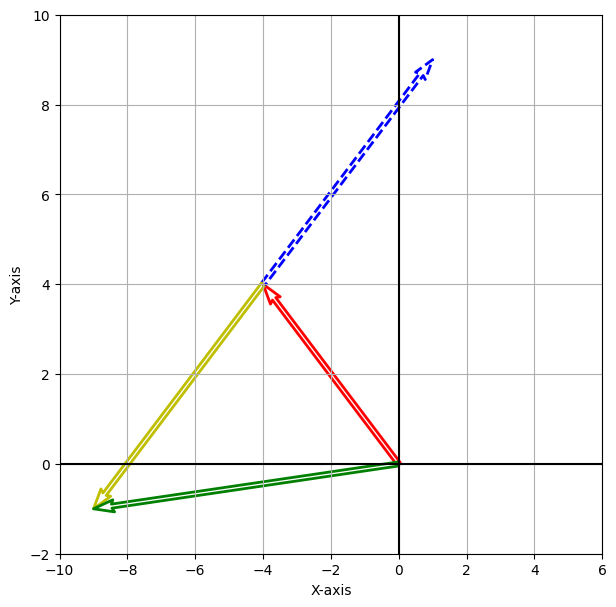

In [2]:
draw_subtraction([-4,4],[5,5])

[-2, 6]  +  [8, -3]  =  (6, 3)


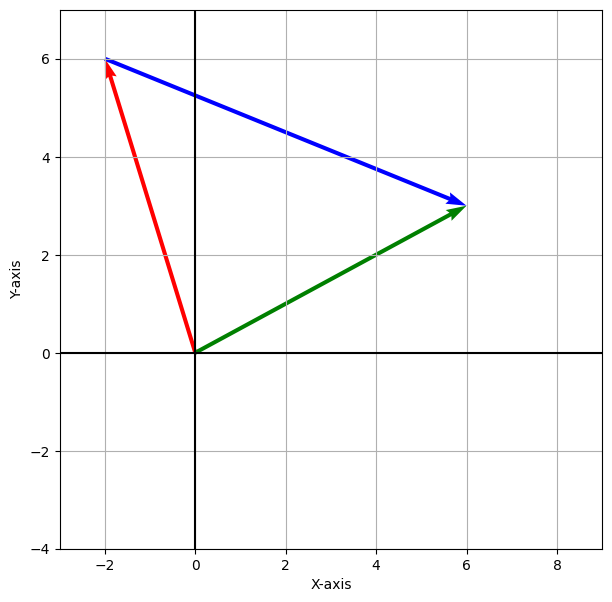

In [3]:
draw_addition([-2,6],[8,-3])

In [4]:
from mpl_toolkits.mplot3d import Axes3D

origin_3d = [0,0,0] # origin point

def draw_vector_product(x,y):
    
    # calculate the cross product of x and y
    xCrossy = np.cross(x,y)
    
    soa = np.array([[origin_3d[0], origin_3d[1], origin_3d[2], x[0], x[1], x[2]], [origin_3d[0], origin_3d[1], origin_3d[2], y[0], y[1], y[2]], [origin_3d[0], origin_3d[1], origin_3d[2], xCrossy[0], xCrossy[1], xCrossy[2]]])

    X, Y, Z, U, V, W = zip(*soa)
    
    print(x," x ",y," = ",xCrossy)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Color by azim
    c = np.arctan2(V, U)
    # Flatten and normalize
    c = (c.ravel() - c.min()) / np.ptp(c)
    # Repeat for each body line and two head lines
    c = np.concatenate((c, np.repeat(c, 2)))
    # Colormap
    c = plt.cm.hsv(c)
    
    ax.quiver(X, Y, Z, U, V, W, colors=c, arrow_length_ratio=0.1, lw=2)
    
    # set the x, y and z axis limits
    xlow = min(origin_3d[0],x[0],y[0],xCrossy[0])-1
    xhigh = max(origin_3d[0],x[0],y[0],xCrossy[0])+1
    ylow = min(origin_3d[1],x[1],y[1],xCrossy[1])-1
    yhigh = max(origin_3d[1],x[1],y[1],xCrossy[1])+1
    zlow = min(origin_3d[2],x[2],y[2],xCrossy[2])-1
    zhigh = max(origin_3d[2],x[2],y[2],xCrossy[2])+1
    ax.set_xlim([xlow, xhigh])
    ax.set_ylim([ylow, yhigh])
    ax.set_zlim([zlow, zhigh])
    
    # draw axes
    ax.plot([xlow,xhigh],[0,0],[0,0],'k--')
    ax.plot([0,0],[ylow,yhigh],[0,0],'k--')
    ax.plot([0,0],[0,0],[zlow,zhigh],'k--')
    
    # Draw axis labels
    ax.text(xhigh,0,0,'+X')
    ax.text(0,yhigh,0,'+Y')
    ax.text(0,0,zhigh,'+Z')
    
    # Set azimuth and elevation
    ax.view_init(azim=30, elev=30)
    
    plt.draw()
    plt.show()

[2, 2, 2]  x  [-2, -2, 2]  =  [ 8 -8  0]


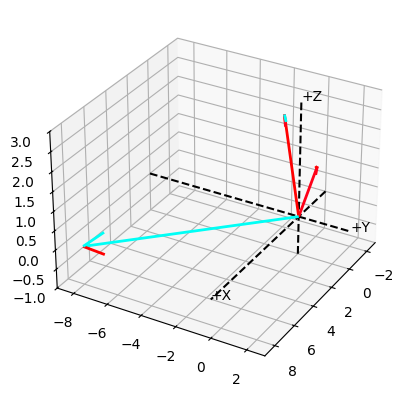

In [5]:
#draw_vector_product([-1,0,1],[0,1,1])
#draw_vector_product([1,0,0],[0,-1,0])
draw_vector_product([2,2,2],[-2,-2,2])
#draw_vector_product([10,-2,3],[-4,5,-1])